# Tratativa dos dados
---

## Importando bibliotecas necessárias 
---

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

## Configurações das bibliotecas
---


In [34]:
pd.set_option('display.max_rows', 200)
pd.set_option( 'display.max_columns', 100)

warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (15, 6)
plt.style.use('seaborn-darkgrid')

## Exploração dos dados
---

In [35]:
dados = pd.read_csv('./data/house_data.csv')
print(f'Dimensão do dataset -> {dados.shape}')
dados.head()

Dimensão do dataset -> (10692, 13)


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [36]:
dados = dados.drop(columns= ['fire insurance (R$)', 'total (R$)'])
dados.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25


In [37]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   city               10692 non-null  object
 1   area               10692 non-null  int64 
 2   rooms              10692 non-null  int64 
 3   bathroom           10692 non-null  int64 
 4   parking spaces     10692 non-null  int64 
 5   floor              10692 non-null  object
 6   animal             10692 non-null  object
 7   furniture          10692 non-null  object
 8   hoa (R$)           10692 non-null  int64 
 9   rent amount (R$)   10692 non-null  int64 
 10  property tax (R$)  10692 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 919.0+ KB


In [38]:
dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                object
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

In [39]:
dados.isnull().sum()

city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [40]:
dados.nunique()

city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64

## Exploração Análitica (EDA)
---

In [41]:
# Filtrar os tipos de colunas
colunas_categoricas = dados.columns[dados.dtypes == object]
colunas_numericas = dados.columns[dados.dtypes != object]


colunas_categoricas, colunas_numericas

(Index(['city', 'floor', 'animal', 'furniture'], dtype='object'),
 Index(['area', 'rooms', 'bathroom', 'parking spaces', 'hoa (R$)',
        'rent amount (R$)', 'property tax (R$)'],
       dtype='object'))

### Análise dos campos categóricos
---

In [42]:
for coluna in colunas_categoricas:
    analise_coluna = dados[coluna].value_counts(normalize=True) * 100
    print(f'\nColuna: {coluna}')
    print(analise_coluna)


Coluna: city
city
São Paulo         55.059858
Rio de Janeiro    14.038533
Belo Horizonte    11.765806
Porto Alegre      11.157875
Campinas           7.977927
Name: proportion, dtype: float64

Coluna: floor
floor
-      23.017209
1      10.110363
2       9.212495
3       8.707445
4       6.995885
5       5.611672
6       5.041152
7       4.648335
8       4.582866
9       3.451178
10      3.338945
11      2.833895
12      2.403666
13      1.870557
14      1.589974
15      1.374860
16      1.019454
17      0.897868
18      0.701459
19      0.495698
20      0.411523
21      0.392817
25      0.233820
23      0.233820
22      0.224467
26      0.187056
24      0.177703
27      0.074822
28      0.056117
29      0.046764
32      0.018706
35      0.009353
46      0.009353
301     0.009353
51      0.009353
Name: proportion, dtype: float64

Coluna: animal
animal
acept        77.777778
not acept    22.222222
Name: proportion, dtype: float64

Coluna: furniture
furniture
not furnished    75.626637
f

In [43]:
# Correção dos dados 

# Ajustando o andar
dados.loc[dados.floor == '301']
dados.iloc[2562, 5] = 30

# Ajustar o '-'
dados.floor = dados.floor.apply(lambda registro: 0 if registro == '-' else registro)
dados.floor = pd.to_numeric(dados.floor)

dados.dtypes

city                 object
area                  int64
rooms                 int64
bathroom              int64
parking spaces        int64
floor                 int64
animal               object
furniture            object
hoa (R$)              int64
rent amount (R$)      int64
property tax (R$)     int64
dtype: object

### Análise dos campos numéricos
---

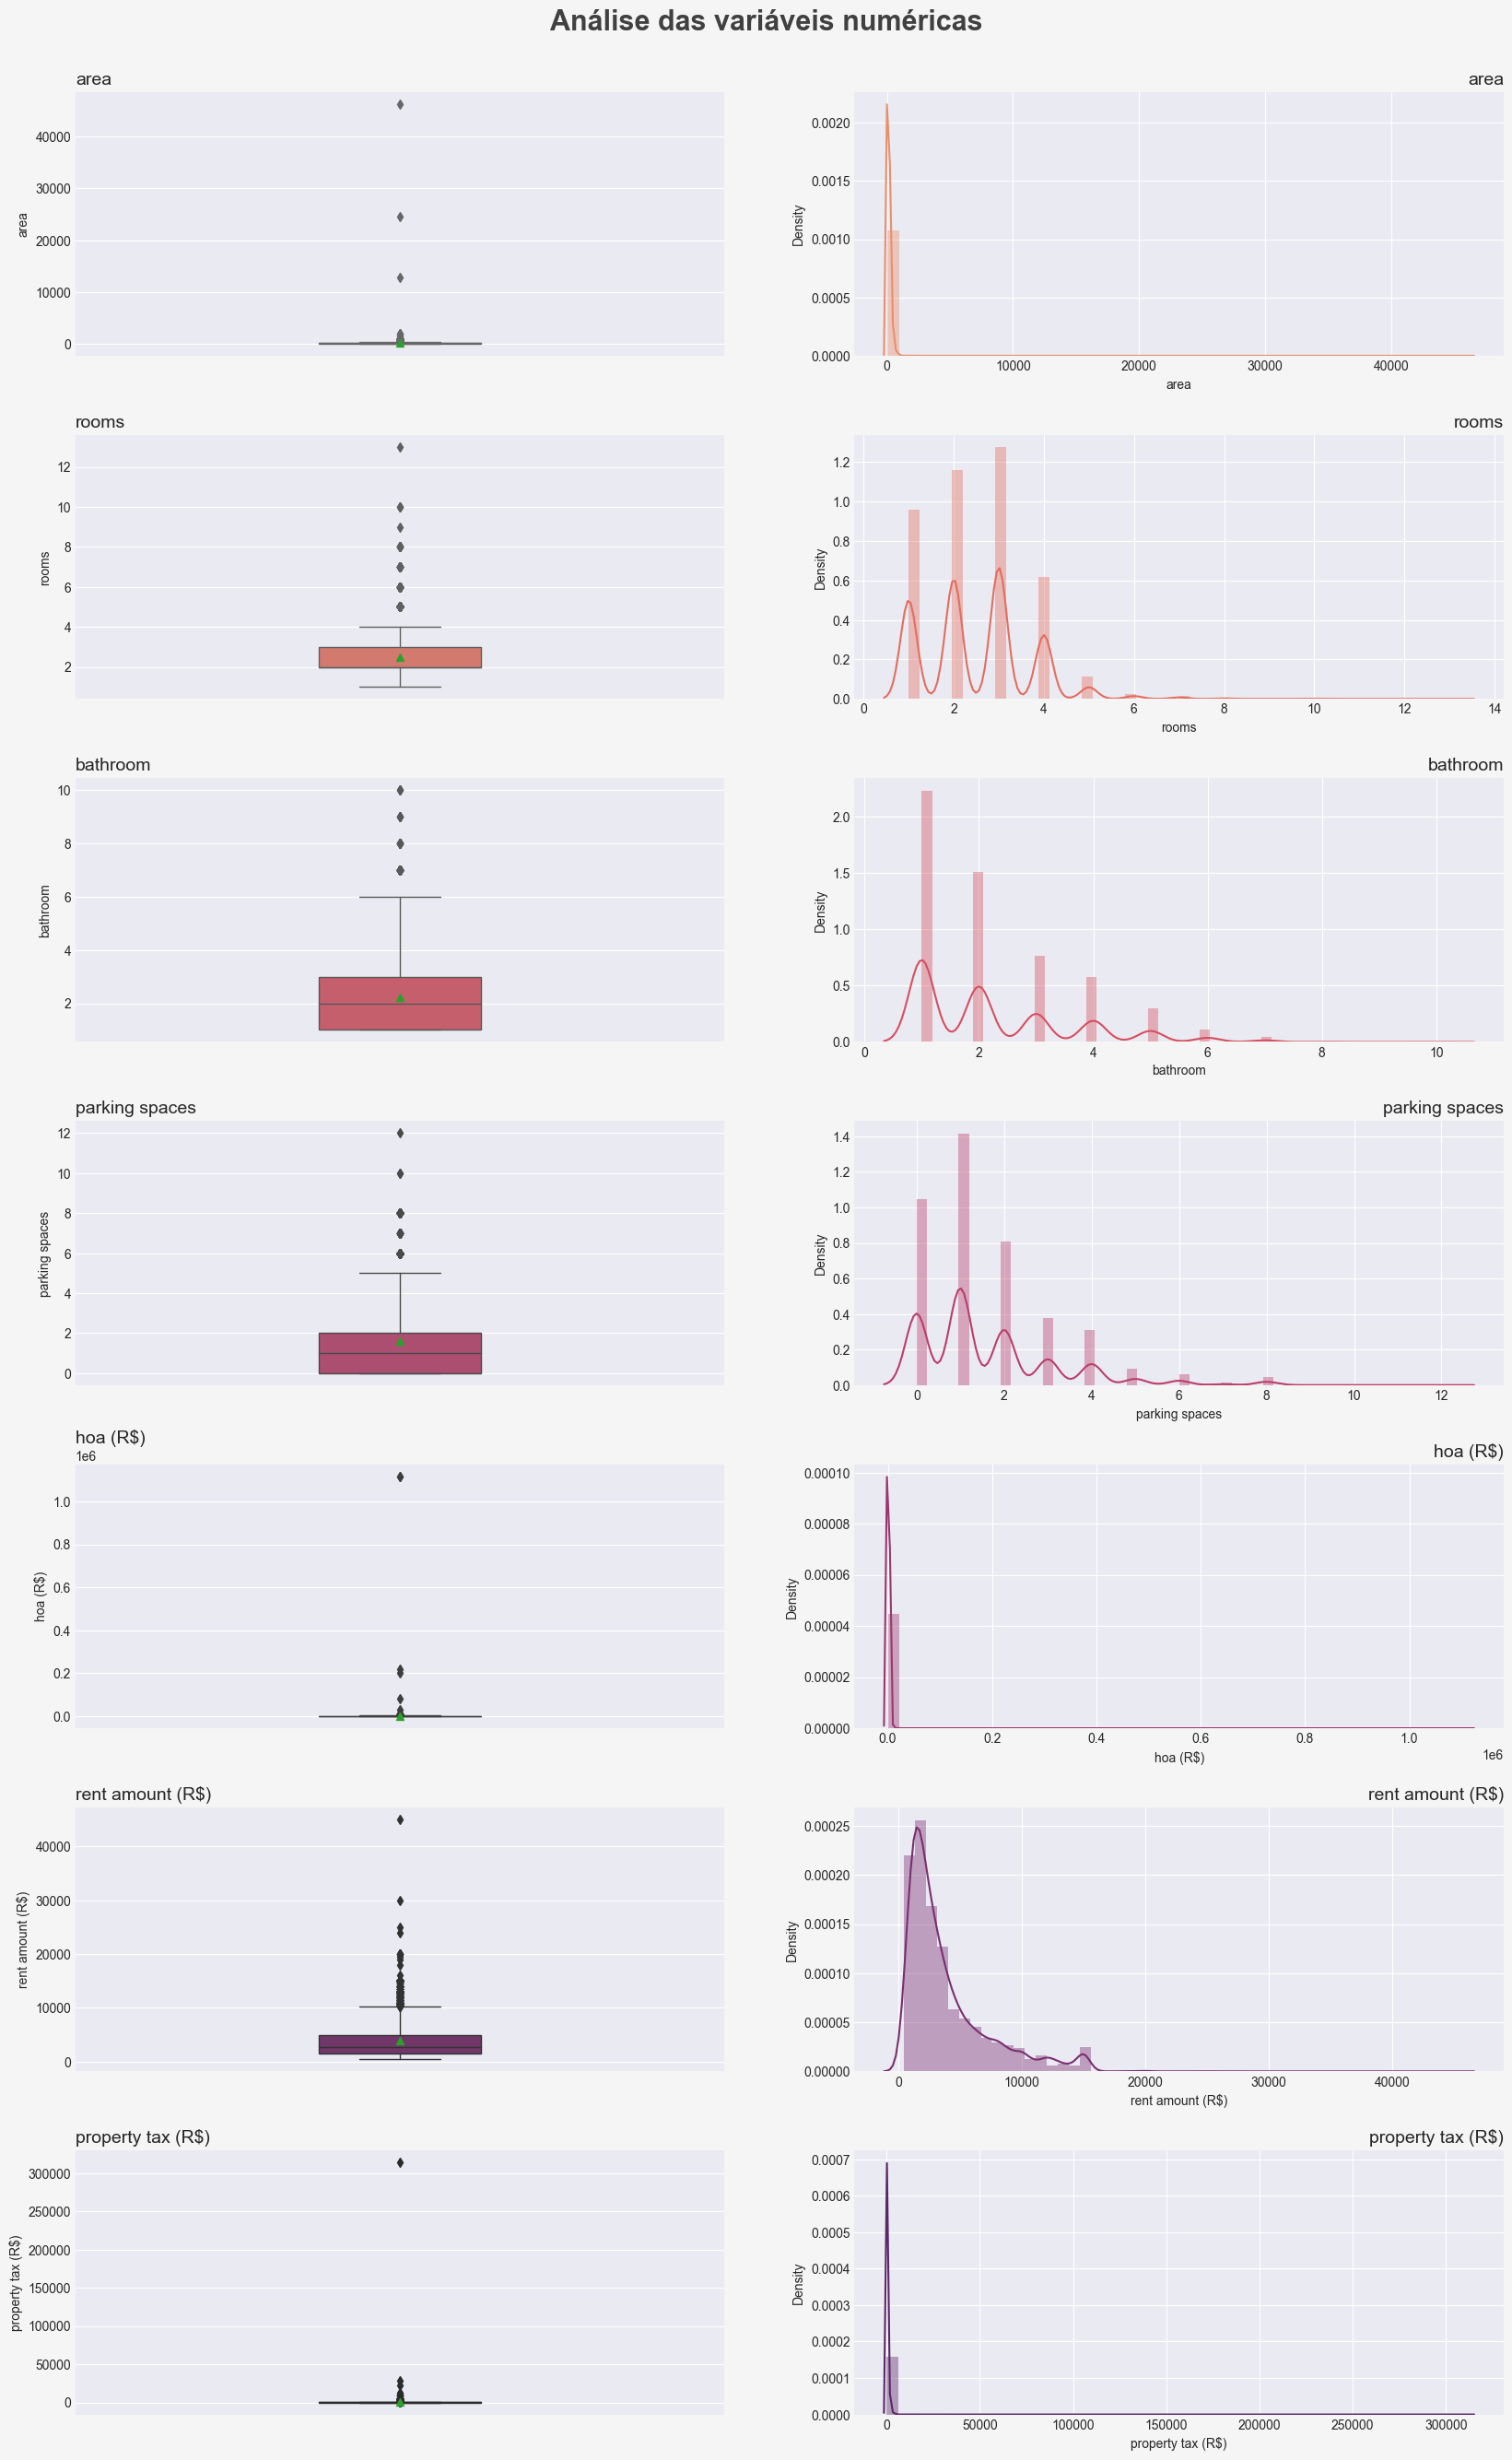

In [44]:
figura, eixo = plt.subplots(figsize=(20, 30))

cor_fundo = '#f5f5f5'
figura.set_facecolor(cor_fundo)

paleta_de_cores = sns.color_palette('flare', len(colunas_numericas) * 2)

plt.suptitle("Análise das variáveis numéricas", fontsize=22, color="#404040", fontweight=600)

linhas = 7    # Quantidade de colunas presentes nas colunas numéricas
colunas =  2  # (boxplot - distplot)
posicao = 1   # Posição inicial do grid


for coluna in colunas_numericas:
    # plot do boxplot
    plt.subplot(linhas, colunas, posicao)
    plt.title(f'{coluna}', loc="left", fontsize=14, fontweight=200)
    sns.boxplot(data=dados, y=coluna, showmeans=True, saturation=0.75, linewidth=1, color=paleta_de_cores[posicao], width=0.25)
    
    
    posicao += 1
    # plot do distplot
    plt.subplot(linhas, colunas, posicao)
    plt.title(f'{coluna}', loc="right", fontsize=14, fontweight=200)
    sns.distplot(dados[coluna], color=paleta_de_cores[posicao - 1])
    
    posicao += 1
    
    
plt.subplots_adjust(top=0.95, hspace=0.3)

In [45]:
dados.loc[ dados.area <= 10000].area.describe()

count    10689.000000
mean       141.431846
std        134.348219
min         11.000000
25%         56.000000
50%         90.000000
75%        182.000000
max       2000.000000
Name: area, dtype: float64

In [46]:
dados.loc[ dados['hoa (R$)'] <= 10000]['hoa (R$)'].describe()

count    10683.000000
mean       911.949827
std       1104.885520
min          0.000000
25%        170.000000
50%        558.000000
75%       1230.000000
max      10000.000000
Name: hoa (R$), dtype: float64

In [47]:
dados['hoa (R$)'].sort_values(ascending=False).head(20)

255      1117000
6979     1117000
6230      220000
2859      200000
2928       81150
1444       32000
1213       15000
415        14130
5293       14000
8858       10000
974        10000
547         9900
7020        9500
7679        9000
1862        8600
6185        8500
1072        8500
10184       8362
254         8300
722         8133
Name: hoa (R$), dtype: int64

In [48]:
dados.iloc[255]

city                 Belo Horizonte
area                            155
rooms                             1
bathroom                          4
parking spaces                    0
floor                             4
animal                    not acept
furniture             not furnished
hoa (R$)                    1117000
rent amount (R$)               2790
property tax (R$)                64
Name: 255, dtype: object

In [49]:
dados['rent amount (R$)'].sort_values(ascending=False)

2182     45000
7748     30000
6947     25000
2619     24000
1743     20000
         ...  
8070       500
7502       500
5152       500
4022       460
10627      450
Name: rent amount (R$), Length: 10692, dtype: int64

In [50]:
dados['property tax (R$)'].sort_values(ascending=False).head(20)

6645     313700
6243      28120
1699      21880
10172     12500
5331      10830
2928       9900
7674       9500
19         9500
8187       8750
2182       8750
5915       7859
7679       5917
9765       5834
421        5700
3494       5500
7459       5404
10410      5200
9595       5160
8399       5032
1862       5000
Name: property tax (R$), dtype: int64

In [51]:
dados.iloc[6645]

city                     São Paulo
area                            42
rooms                            1
bathroom                         2
parking spaces                   1
floor                            6
animal                   not acept
furniture            not furnished
hoa (R$)                       690
rent amount (R$)              2500
property tax (R$)           313700
Name: 6645, dtype: object

## Engenharia de features
---

In [53]:
### Ajuste das colunas categóricas
colunas_categoricas

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [56]:
dados.furniture

0            furnished
1        not furnished
2        not furnished
3        not furnished
4        not furnished
             ...      
10687        furnished
10688    not furnished
10689        furnished
10690        furnished
10691    not furnished
Name: furniture, Length: 10692, dtype: object

In [54]:
dados.animal

0            acept
1            acept
2            acept
3            acept
4        not acept
           ...    
10687    not acept
10688        acept
10689    not acept
10690        acept
10691        acept
Name: animal, Length: 10692, dtype: object

In [57]:
dados.animal = dados.animal.map({'acept': 1, 'not acept': 0})
dados.furniture = dados.furniture.map({'furnished': 1, 'not furnished': 0})

In [61]:
# MVP -->  Filtrar a cidade de São Paulo
filtro_sp = dados.loc[dados.city == 'São Paulo']
filtro_sp.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211
1,São Paulo,320,4,4,0,20,1,0,1200,4960,1750
4,São Paulo,25,1,1,0,1,0,0,0,800,25
5,São Paulo,376,3,3,7,0,1,0,0,8000,834
7,São Paulo,213,4,4,4,4,1,0,2254,3223,1735


In [62]:
# Retirando a coluna cidade 
filtro_sp.drop(columns=['city'], inplace=True)

### Separando os dados
---

In [63]:
caracteristicas = filtro_sp.drop(columns=['rent amount (R$)'])
previsor = filtro_sp['rent amount (R$)']

caracteristicas.shape, previsor.shape

((5887, 9), (5887,))

### Correlação das features
---

In [78]:
filtro_sp.corr()

,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
area,1.000000,0.306863,0.316543,0.300795,-0.038790,0.073565,-0.018145,0.056091,0.274749,0.065289
rooms,0.306863,1.000000,0.759432,0.645041,-0.092117,0.213963,-0.088931,0.136343,0.537622,0.071702
bathroom,0.316543,0.759432,1.000000,0.703530,-0.015503,0.159097,0.005864,0.163205,0.638924,0.101616
parking spaces,0.300795,0.645041,0.703530,1.000000,-0.038378,0.165253,-0.015155,0.115951,0.573373,0.092362
floor,-0.038790,-0.092117,-0.015503,-0.038378,1.000000,-0.014202,0.135180,0.107211,0.065294,0.005672
animal,0.073565,0.213963,0.159097,0.165253,-0.014202,1.000000,-0.066208,0.020575,0.107147,-0.005308
furniture,-0.018145,-0.088931,0.005864,-0.015155,0.135180,-0.066208,1.000000,0.042860,0.154316,-0.007852
hoa (R$),0.056091,0.136343,0.163205,0.115951,0.107211,0.020575,0.042860,1.000000,0.188147,0.028872
rent amount (R$),0.274749,0.537622,0.638924,0.573373,0.065294,0.107147,0.154316,0.188147,1.000000,0.091749
property tax (R$),0.065289,0.071702,0.101616,0.092362,0.005672,-0.005308,-0.007852,0.028872,0.091749,1.000000


In [79]:
# !python -m pip install yellowbrick -qq

In [80]:
from yellowbrick.features import Rank2D

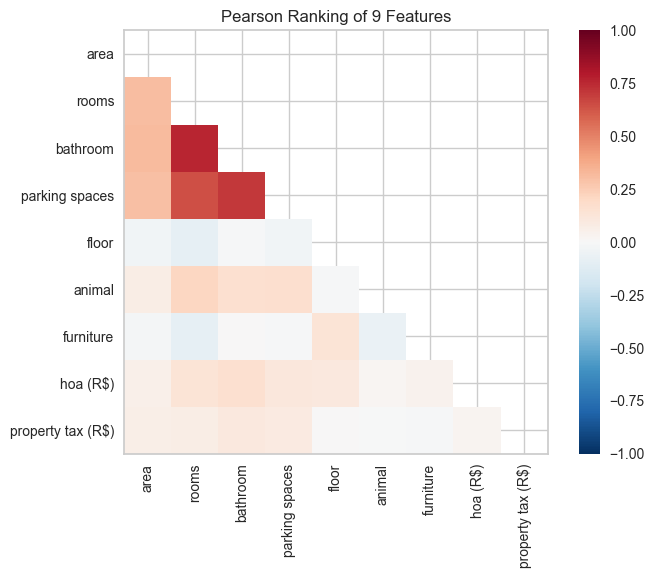

In [81]:
correlacao = Rank2D(algoritmo='pearson')

correlacao.fit(caracteristicas, previsor)
correlacao.transform(caracteristicas)
correlacao.show();

## Separando os dados de treino e teste
---

In [83]:
from sklearn.model_selection import train_test_split
 
x_treino, x_teste, y_treino, y_teste = train_test_split(caracteristicas, previsor, test_size=0.3 , random_state=10)